<a href="https://colab.research.google.com/github/Molten-Ice/Kaggle/blob/main/02_Neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Data
import sklearn
from sklearn.datasets import make_circles

In [24]:
n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=3)
len(X), len(y)

(1000, 1000)

In [5]:
X[:5], y[:5]

(array([[-0.14262555,  0.76735775],
        [-0.80555499, -0.08834659],
        [ 0.33596039, -0.65704399],
        [-0.77683638,  0.57673511],
        [ 0.37742784,  0.69483248]]), array([1, 1, 1, 0, 1]))

In [6]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,-0.142626,0.767358,1
1,-0.805555,-0.088347,1
2,0.335960,-0.657044,1
3,-0.776836,0.576735,0
4,0.377428,0.694832,1
5,-0.661527,-0.430946,1
6,-0.297184,0.735692,1
7,-0.796143,-0.035503,1
8,0.466002,-0.934256,0
9,1.019159,-0.031567,0


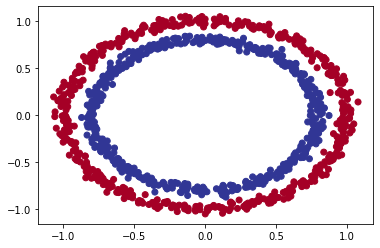

In [25]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [12]:
X.shape, y.shape

((1000, 2), (1000,))

In [20]:
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample: {X_sample}, {y_sample}")

Values for one sample: tensor([-0.1426,  0.7674]), 1


In [15]:
import torch
torch.__version__

'1.13.1+cu116'

In [19]:
type(X), X.dtype

(torch.Tensor, torch.float32)

In [26]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [27]:
X[:5], y[:5]

(tensor([[-0.1426,  0.7674],
         [-0.8056, -0.0883],
         [ 0.3360, -0.6570],
         [-0.7768,  0.5767],
         [ 0.3774,  0.6948]]), tensor([1., 1., 1., 0., 1.]))

In [28]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [29]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

In [38]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [44]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.two_linear_layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=5),
        nn.Linear(in_features = 5, out_features = 1))
    
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.two_linear_layers(x)

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [45]:
model_0.state_dict()

OrderedDict([('two_linear_layers.0.weight', tensor([[-0.3887, -0.0080],
                      [ 0.0652, -0.2817],
                      [-0.4476, -0.0867],
                      [-0.3319,  0.2743],
                      [-0.4274,  0.3417]])),
             ('two_linear_layers.0.bias',
              tensor([-0.6358, -0.5720,  0.4620, -0.2039, -0.1357])),
             ('two_linear_layers.1.weight',
              tensor([[ 0.0951,  0.1169,  0.2893, -0.2117, -0.1530]])),
             ('two_linear_layers.1.bias', tensor([-0.2446]))])

In [55]:
with torch.inference_mode():

  untrained_preds = model_0(X_test.to(device))
nn.L1Loss()(untrained_preds.squeeze(), y_test).detach()

tensor(0.6877)

In [56]:
untrained_preds[:5], y_test[:5]

(tensor([[-0.1064],
         [-0.2137],
         [-0.0504],
         [-0.2145],
         [-0.0927]]), tensor([1., 0., 0., 1., 1.]))

In [57]:
loss_fn = nn.BCEWithLogitsLoss()